# Introduction

On va s'intéresser à la visualisation des données

# Import des modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
%matplotlib notebook

# Lecture des données

In [3]:
df = pd.read_csv('datas_cleaned.csv', index_col=0)

In [4]:
df.head()

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TotalDelay,Delayed
Vol_8424,1,1,1.0,1439,450.0,453,US,269.0,274.0,248.0,-3.0,2.0,LAS,FLL,2174,0,False
Vol_238734,1,1,4.0,1357,70.0,1420,AA,66.0,63.0,53.0,90.0,87.0,ORD,STL,258,90,True
Vol_262396,1,1,8.0,1435,499.0,480,B6,311.0,305.0,466.0,19.0,13.0,PDX,JFK,2454,19,True
Vol_238703,1,1,8.0,1435,330.0,330,AA,202.0,215.0,190.0,0.0,13.0,SEA,DFW,1660,0,False
Vol_253414,1,1,8.0,1335,89.0,1415,AA,81.0,80.0,63.0,114.0,113.0,ORD,MCI,403,114,True


# différents types de graphe sont classiquement utilisés selon la nature des variables x et y observées

### x numérique et y numérique => scatterplot

##### Graphe immédiat avec pandas

<IPython.core.display.Javascript object>


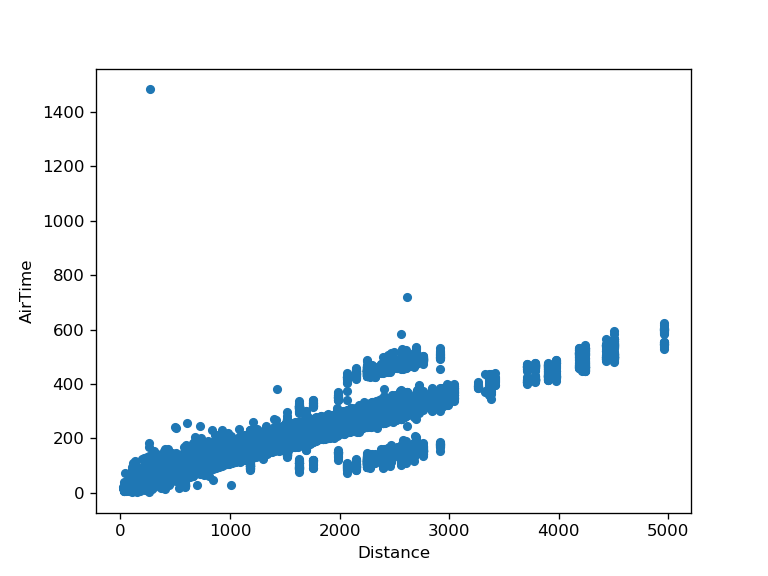

In [5]:
df.plot(x='Distance', y='AirTime', kind='scatter')

In [7]:
df[df.AirTime > 1400]

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TotalDelay,Delayed
Vol_264988,15,1,340.0,1360,411.0,1430,B6,1511.0,70.0,1484.0,421.0,-1020.0,JFK,BTV,267,421,True


In [8]:
df.AirTime = [x - 1440 if x > 1440 else x + 1440 if x < 0 else x for x in df.AirTime]

<IPython.core.display.Javascript object>


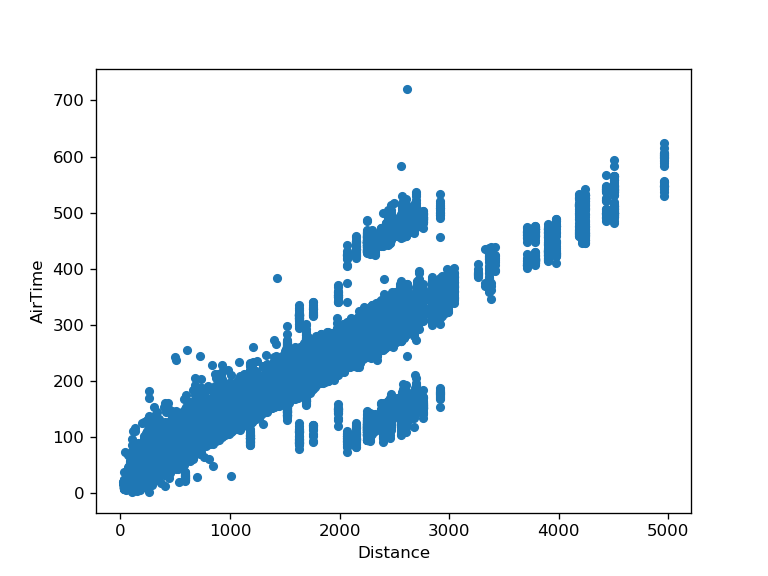

In [9]:
df.plot(x='Distance', y='AirTime', kind='scatter')

##### Graphe plus construit avec matplotlib

<IPython.core.display.Javascript object>


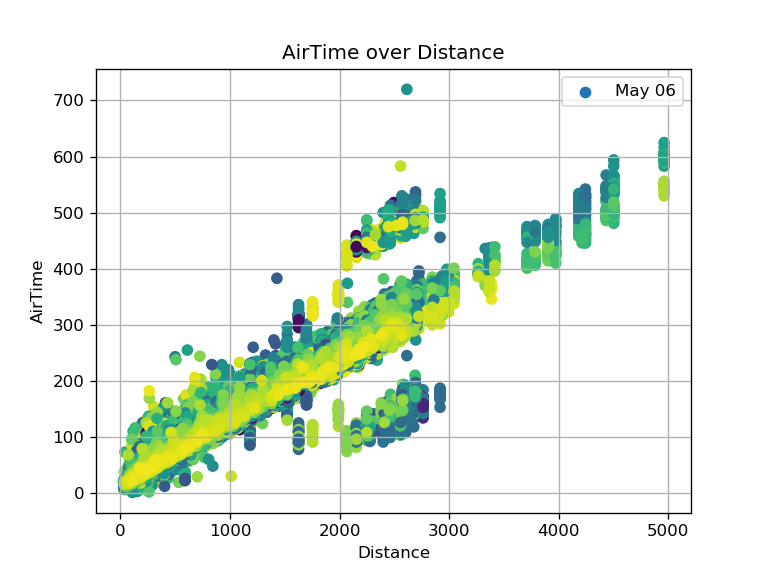

In [10]:
plt.figure()
plt.scatter(df.Distance, df.AirTime, c=df.DepTime, label='May 06')
plt.xlabel('Distance')
plt.ylabel('AirTime')
plt.title('AirTime over Distance')
plt.grid()
plt.legend()

##### Graphe 3D

<IPython.core.display.Javascript object>


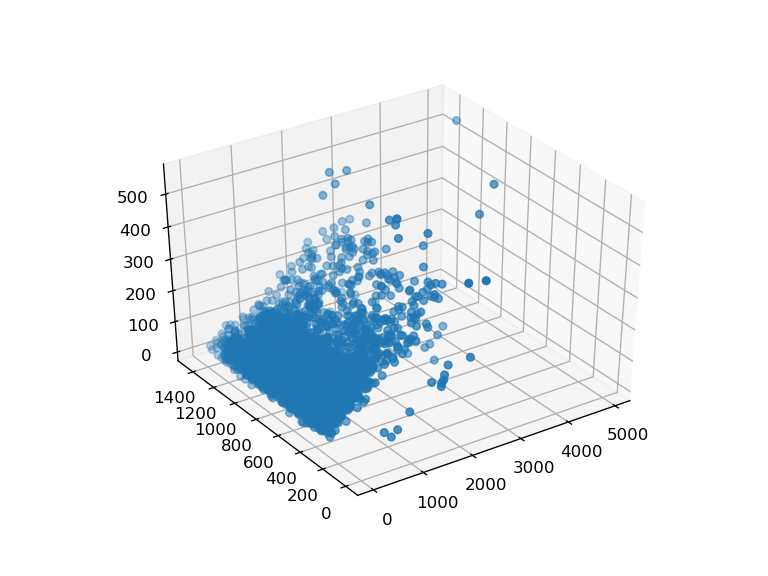

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Distance[::100], df.DepTime[::100], df.AirTime[::100])

##### pairplot

<IPython.core.display.Javascript object>


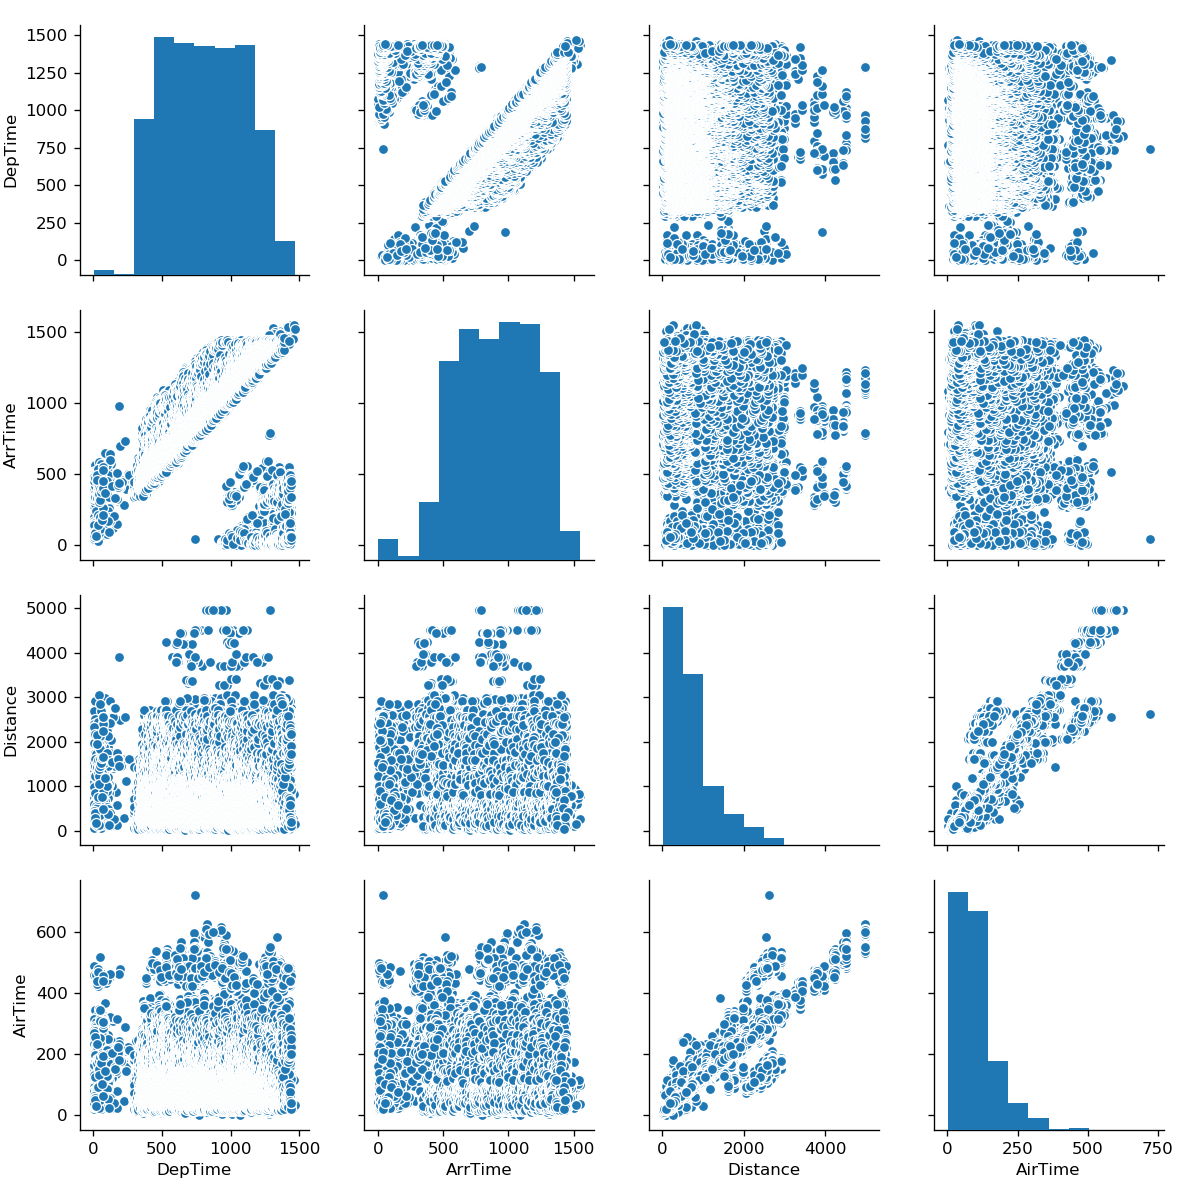

In [12]:
sns.pairplot(df[['DepTime', 'ArrTime', 'Distance', 'AirTime']])

### x catégorielle et y numérique

<IPython.core.display.Javascript object>


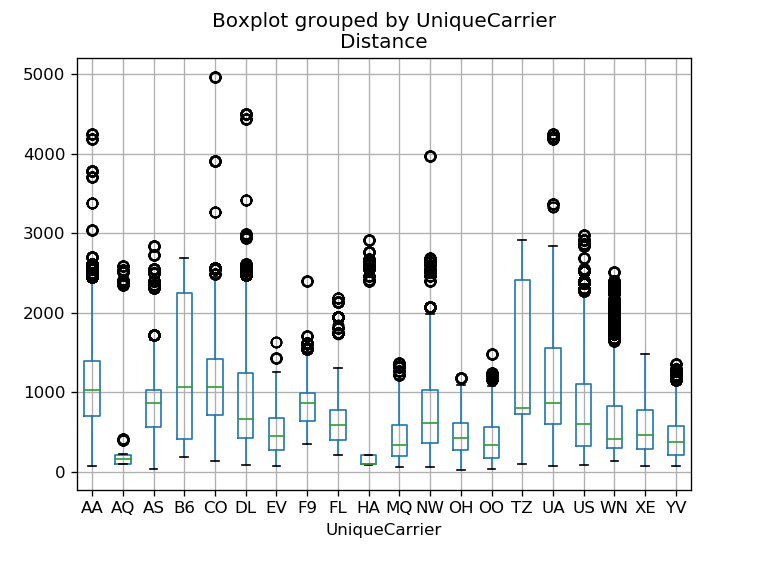

In [13]:
df.boxplot(column='Distance', by='UniqueCarrier')

<IPython.core.display.Javascript object>


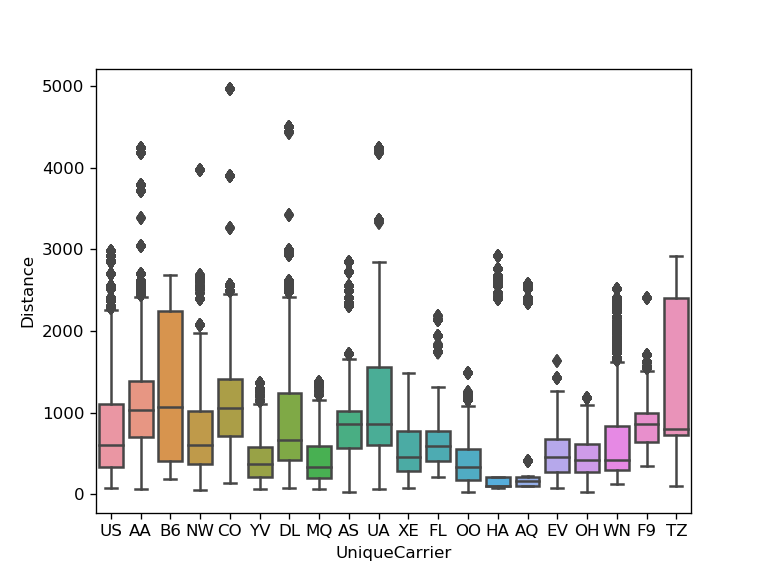

In [14]:
plt.figure()
sns.boxplot(df.UniqueCarrier, df.Distance)

### x numérique et y catégorielle

<IPython.core.display.Javascript object>


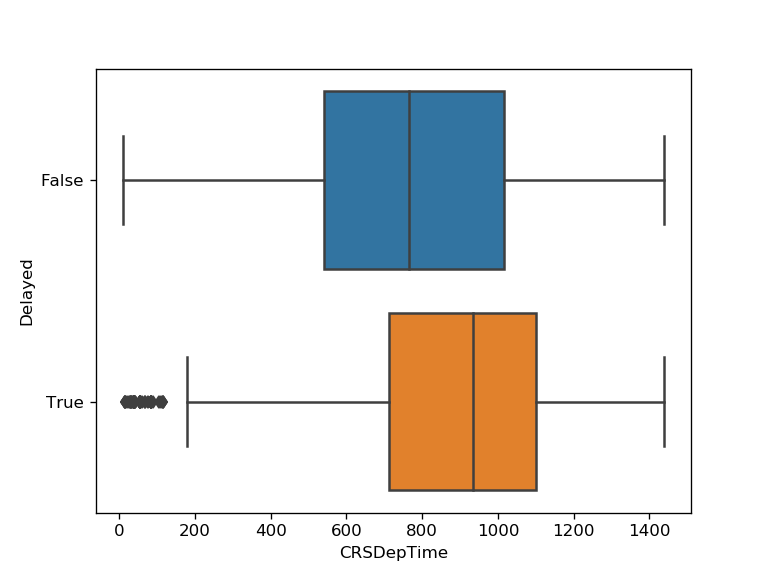

In [16]:
plt.figure()
sns.boxplot(df.CRSDepTime, df.Delayed, orient='h')

<IPython.core.display.Javascript object>


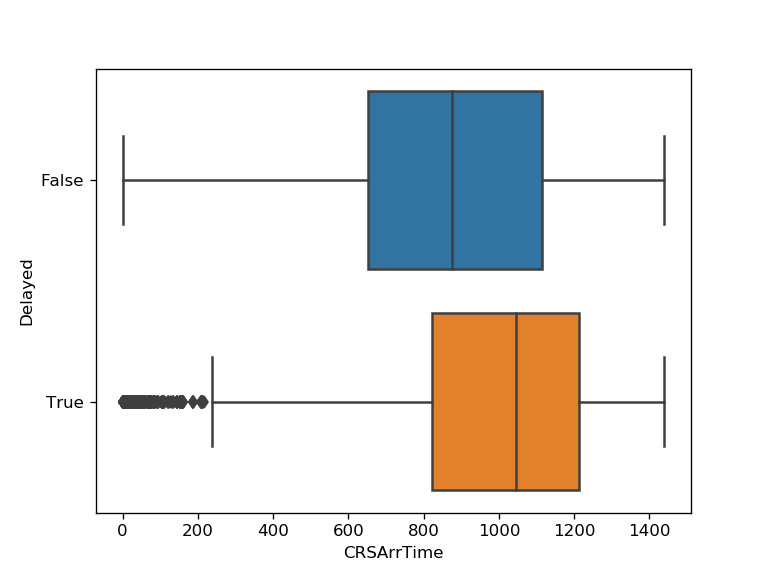

In [17]:
plt.figure()
sns.boxplot(df.CRSArrTime, df.Delayed, orient='h')

### x catégorielle et y catégorielle

<IPython.core.display.Javascript object>


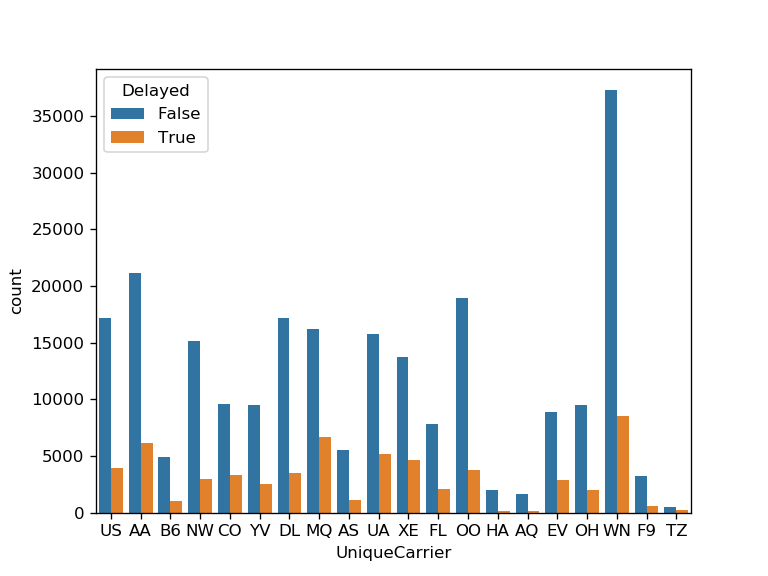

In [18]:
plt.figure()
sns.countplot(x="UniqueCarrier", hue="Delayed", data=df)

In [19]:
txLate = df[['UniqueCarrier', 'Delayed']].groupby('UniqueCarrier').mean()

In [20]:
txLate

,Delayed
UniqueCarrier,
AA,0.225273
AQ,0.104444
AS,0.171950
B6,0.178446
CO,0.254727
DL,0.168538
EV,0.247962
F9,0.157470
FL,0.206691


<IPython.core.display.Javascript object>


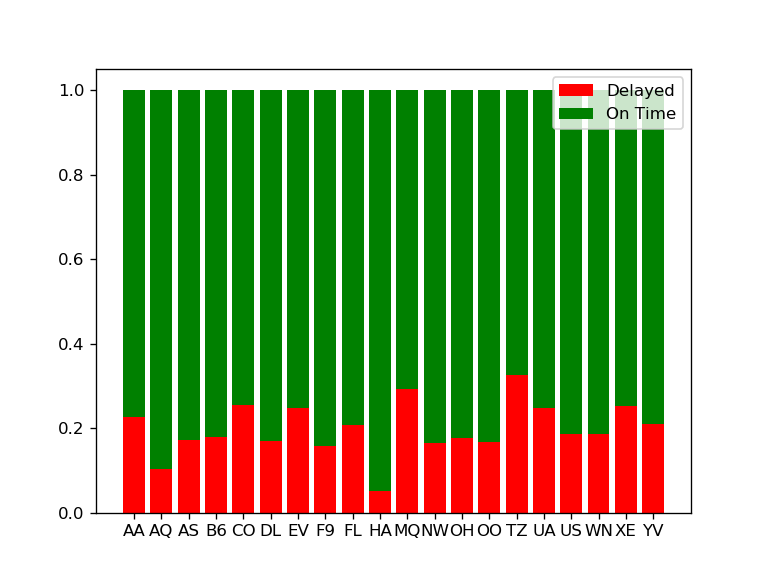

In [23]:
plt.figure()
p1 = plt.bar(txLate.index, txLate.Delayed, label='Delayed',color='r')
p2 = plt.bar(txLate.index, 1-txLate.Delayed, bottom=txLate.Delayed, label='On Time', color='g')
plt.legend()